## Importar bibliotecas necessárias
#### Bibliotecas utilizadas: pandas,  numpy, matplotlib, seaborn pickle

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
import pickle

## Carregar o dataset

In [28]:
data = pd.read_csv("teste_indicium_precificacao.csv")

## Etapa 1: Análise Exploratória de Dados (EDA)
#### Visualizar as primeiras linhas do dataset

In [29]:
print(data.head())

     id                                              nome  host_id  \
0  2595                             Skylit Midtown Castle     2845   
1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
2  3831                   Cozy Entire Floor of Brownstone     4869   
3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name bairro_group        bairro  latitude  longitude  \
0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimo_noites  numero_de_reviews ultima_review  \
0  Entire home/apt    225              1                 45    2019-05-21   
1     Private room    150   

#### Informações gerais sobre o dataset

In [30]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

#### Estatísticas descritivas

In [31]:
print(data.describe())

                 id       host_id      latitude     longitude         price  \
count  4.889400e+04  4.889400e+04  48894.000000  48894.000000  48894.000000   
mean   1.901753e+07  6.762139e+07     40.728951    -73.952169    152.720763   
std    1.098288e+07  7.861118e+07      0.054529      0.046157    240.156625   
min    2.595000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.472371e+06  7.822737e+06     40.690100    -73.983070     69.000000   
50%    1.967743e+07  3.079553e+07     40.723075    -73.955680    106.000000   
75%    2.915225e+07  1.074344e+08     40.763117    -73.936273    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimo_noites  numero_de_reviews  reviews_por_mes  \
count   48894.000000       48894.000000     38842.000000   
mean        7.030085          23.274758         1.373251   
std        20.510741          44.550991         1.680453   
min         1.000000           0.000000         

#### Verificar valores ausentes

In [32]:
print(data.isnull().sum())

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


#### Substituir valores ausentes em 'reviews_por_mes' por 0

In [33]:
data['reviews_por_mes'] = data['reviews_por_mes'].fillna(0)

#### Remover colunas irrelevantes para o modelo

In [34]:
data.drop(columns=['id', 'nome', 'host_id', 'host_name', 'ultima_review'], inplace=True)

#### Gráficos exploratórios

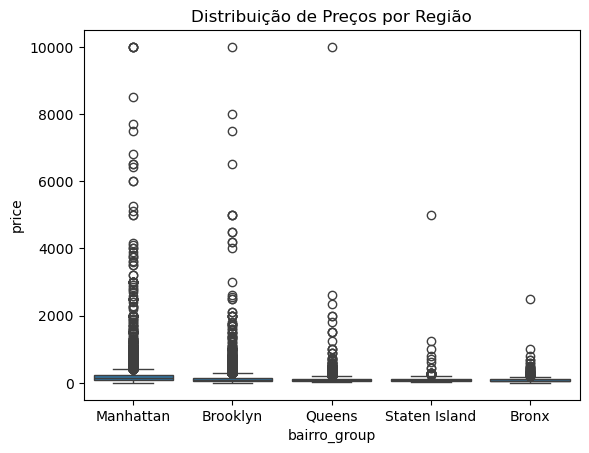

In [35]:
sns.boxplot(x='bairro_group', y='price', data=data)
plt.title('Distribuição de Preços por Região')
plt.show()


#### Matriz de Correlação

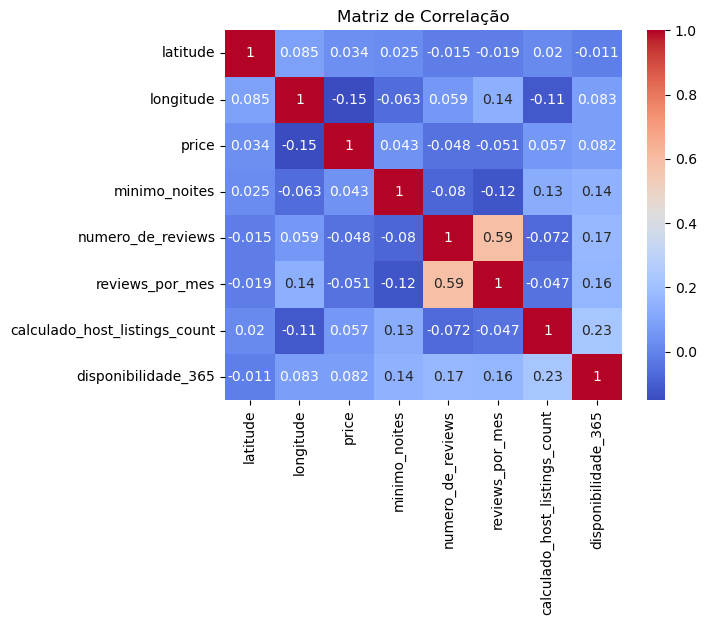

In [36]:
# Selecionar apenas as colunas numéricas
numeric_data = data.select_dtypes(include=['number'])

# Calcular a matriz de correlação
correlation_matrix = numeric_data.corr()

# Criar o heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

## Etapa 2: Preparação dos Dados

#### Remover outliers nos preços

In [37]:
data = data[data['price'] <= data['price'].quantile(0.95)]

#### Converter variáveis categóricas para numéricas

In [38]:
data = pd.get_dummies(data, columns=['bairro_group', 'bairro', 'room_type'], drop_first=True)

#### Definir features e target

In [39]:
X = data.drop(columns=['price'])
y = data['price']

#### Dividir em conjuntos de treino e teste

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Etapa 3: Modelagem Preditiva

#### Instanciar o modelo

In [41]:
model = LinearRegression()

#### Treinar o modelo

In [42]:
model.fit(X_train, y_train)

LinearRegression()

#### Fazer previsões

In [43]:
y_pred = model.predict(X_test)

#### Calculando MAE e RMSE

In [44]:
# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular RMSE usando a função específica
rmse = root_mean_squared_error(y_test, y_pred)

# Exibir resultados
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 2115754.75
RMSE: 144202911.46


## Etapa 4: Previsão de Preço

#### Criando DataFrame para o novo apartamento

In [45]:
novo_apartamento = {
    'latitude': 40.75362,
    'longitude': -73.98377,
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355,
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'room_type': 'Entire home/apt'
}

novo_apartamento_df = pd.DataFrame([novo_apartamento])

# Aplicar as mesmas transformações do pré-processamento
novo_apartamento_df = pd.get_dummies(novo_apartamento_df, columns=['bairro_group', 'bairro', 'room_type'])

# Reindexar para alinhar com as colunas do conjunto de treinamento
novo_apartamento_df = novo_apartamento_df.reindex(columns=X_train.columns, fill_value=0)

# Fazer a previsão
preco_previsto = model.predict(novo_apartamento_df)
print("Preço sugerido ($):", round(preco_previsto[0], 2))



Preço sugerido ($): 228.83


## Etapa 5: Exportar o Modelo

#### Salvando o modelo em formato .pkl

In [46]:
with open('modelo_precificacao.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Modelo salvo como 'modelo_precificacao.pkl'")

Modelo salvo como 'modelo_precificacao.pkl'


## Etapa 6: Executando o Modelo

#### Carregando o Arquivo do moledo exportado anteriormente

In [47]:
with open('modelo_precificacao.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

#### Colocando os dados para entrada no modelo

In [48]:
# Exemplo de entrada
novo_apartamento = {
    'latitude': 20.75362,
    'longitude': -73.98377,
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355,
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'room_type': 'Entire home/apt'
}

# Transformar em DataFrame
novo_apartamento_df = pd.DataFrame([novo_apartamento])

# Aplicar transformações (exemplo: get_dummies)
novo_apartamento_df = pd.get_dummies(novo_apartamento_df, columns=['bairro_group', 'bairro', 'room_type'])
novo_apartamento_df = novo_apartamento_df.reindex(columns=X_train.columns, fill_value=0)


#### Executando a previsão

In [49]:
# Fazer a previsão
preco_previsto = loaded_model.predict(novo_apartamento_df)
print("Preço sugerido ($):", round(preco_previsto[0], 2))

Preço sugerido ($): 2161.76
